# Baseline Model

Below we have the baseline model using an SVM network.

In [1]:
"""
Baseline Model - SVM
"""

import cv2
import numpy as np
import os

from sklearn import linear_model, metrics, svm 
from sklearn.model_selection import train_test_split

np.random.seed(0)
RANDOM_NUM = np.random.randint(1000)

In [2]:
DATA_PATH = "KLARR_NET_data/fer_2013"

IMG_WIDTH = 48
IMG_HEIGHT = 48

def create_dataset(img_folder):
    """ Creates a dataset of the images in the given folder and returns the
    data and labels array.
    """
    img_data_array = []
    class_name = []
   
    for class_num, dir in enumerate(os.listdir(img_folder)):
        print(f"Class Num: {class_num}, Directory: {dir}")

        for i, filename in enumerate(os.listdir(os.path.join(img_folder, dir))):
            if i % 1000 == 0:
                print(i)

            # Read the image in grayscale
            image_path = os.path.join(img_folder, dir, filename)
            image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
            image = cv2.resize(
                image,
                (IMG_HEIGHT, IMG_WIDTH),
                interpolation=cv2.INTER_AREA
            )

            # Convert to numpy and normalize between 0 and 1
            image = np.array(image).astype('float32').flatten() / 255

            img_data_array.append(image)
            class_name.append(class_num)

    return np.array(img_data_array), np.array(class_name)

X_train, y_train = create_dataset(DATA_PATH)
X_train, X_test, y_train, y_test = train_test_split(
    X_train,
    y_train,
    train_size=0.7,
    random_state=RANDOM_NUM)

Class Num: 0, Directory: angry
0
1000
2000
3000
4000
Class Num: 1, Directory: fear
0
1000
2000
3000
4000
5000
Class Num: 2, Directory: happy
0
1000
2000
3000
4000
5000
Class Num: 3, Directory: neutral
0
1000
2000
3000
4000
5000
6000
Class Num: 4, Directory: sad
0
1000
2000
3000
4000
5000
6000
Class Num: 5, Directory: surprise
0
1000
2000
3000


In [3]:
CLASSES = ['angry', 'fear', 'happy' ,'neutral' ,'sad' ,'surprise']

def print_class_distribution_in_dataset(dataset_labels):
    num_classes = [0] * len(CLASSES)
    for label in dataset_labels:
        num_classes[label] += 1
    
    for i, num_of_class in enumerate(num_classes):
        print(f"Class: {CLASSES[i]}, Number of Classes: {num_of_class}")

print(f"Baseline Model Training Set Size: {len(X_train)}")
print_class_distribution_in_dataset(y_train)

print(f"\nBaseline Model Test Set Size: {len(X_test)}")
print_class_distribution_in_dataset(y_test)


Baseline Model Training Set Size: 22405
Class: angry, Number of Classes: 3466
Class: fear, Number of Classes: 3532
Class: happy, Number of Classes: 3984
Class: neutral, Number of Classes: 4364
Class: sad, Number of Classes: 4252
Class: surprise, Number of Classes: 2807

Baseline Model Test Set Size: 9603
Class: angry, Number of Classes: 1451
Class: fear, Number of Classes: 1545
Class: happy, Number of Classes: 1801
Class: neutral, Number of Classes: 1822
Class: sad, Number of Classes: 1810
Class: surprise, Number of Classes: 1174


In [4]:
from joblib import dump, load
from pathlib import Path

MODELS_DIR = "models"

def train_and_test_baseline(model):
    """ Fits model to training data and prints information about its accuracy
    with respect to test data.
    """
    model.fit(X_train, y_train)

    # Test its accuracy on testing data
    y_pred = model.predict(X_test)
    classification_report = metrics.classification_report(y_test, y_pred)
    confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

    baseline_test_acc = model.score(X_test, y_test)
    print(f"Baseline Model Test Accuracy: {baseline_test_acc}")

    print(f"Classification report for classifier {model}:")
    print(f"\n{classification_report}")

    print(f"\nConfusion matrix:\n\n{confusion_matrix}")

def save_baseline(model, name):
    file_name = f"baseline_model_{name}.joblib"
    model_location = os.path.join(MODELS_DIR, file_name)

    Path(MODELS_DIR).mkdir(parents=True, exist_ok=True)
    dump(model, model_location)

    # To load the model, use this expression
    # clf = load(model_location)

In [5]:
baseline_model_1 = linear_model.SGDClassifier(
    loss='log',
    n_jobs=-1,
    random_state=RANDOM_NUM
)

train_and_test_baseline(baseline_model_1)

Baseline Model Test Accuracy: 0.28157867333125064
Classification report for classifier SGDClassifier(loss='log', n_jobs=-1, random_state=684):

              precision    recall  f1-score   support

           0       0.27      0.16      0.20      1451
           1       0.21      0.29      0.24      1545
           2       0.46      0.30      0.36      1801
           3       0.33      0.21      0.25      1822
           4       0.32      0.13      0.18      1810
           5       0.25      0.75      0.37      1174

    accuracy                           0.28      9603
   macro avg       0.30      0.31      0.27      9603
weighted avg       0.31      0.28      0.27      9603


Confusion matrix:

[[232 365 164 143 111 436]
 [123 444 102 150 101 625]
 [153 359 540 182 108 459]
 [129 374 170 377 152 620]
 [196 482 148 241 231 512]
 [ 40 129  42  57  26 880]]


In [6]:
baseline_model_2 = linear_model.SGDClassifier(
    n_jobs=-1,
    random_state=RANDOM_NUM
)

train_and_test_baseline(baseline_model_2)

bm2_params = baseline_model_2.get_params()
save_baseline(
    baseline_model_2,
    f"SGDClassifier_randomstate-{bm2_params['random_state']}"
)

Baseline Model Test Accuracy: 0.2869936478183901
Classification report for classifier SGDClassifier(n_jobs=-1, random_state=684):

              precision    recall  f1-score   support

           0       0.29      0.11      0.16      1451
           1       0.25      0.19      0.21      1545
           2       0.45      0.24      0.32      1801
           3       0.24      0.66      0.35      1822
           4       0.28      0.19      0.23      1810
           5       0.56      0.27      0.36      1174

    accuracy                           0.29      9603
   macro avg       0.35      0.28      0.27      9603
weighted avg       0.34      0.29      0.27      9603


Confusion matrix:

[[ 159  184  152  722  194   40]
 [  90  291   85  786  188  105]
 [  90  155  441  907  182   26]
 [  77  164  116 1210  213   42]
 [  95  230  127  983  343   32]
 [  31  156   55  532   88  312]]


In [ ]:
baseline_model_3 = svm.LinearSVC(
    dual=False,
    C=100,
    max_iter=20,
    random_state=RANDOM_NUM,
)

train_and_test_baseline(baseline_model_3)

bm3_params = baseline_model_3.get_params()
save_baseline(
    baseline_model_3,
    f"LinearSVC_dual-{bm3_params['dual']}_C-{bm3_params['C']}_"
    f"iters-{bm3_params['max_iter']}_randomstate-{bm3_params['random_state']}"
)

In [ ]:
baseline_model_4 = linear_model.SGDClassifier(
    n_jobs=-1,
    learning_rate='invscaling',
    eta0=0.005,
    random_state=RANDOM_NUM,
)

train_and_test_baseline(baseline_model_4)

bm4_params = baseline_model_4.get_params()
save_baseline(
    baseline_model_4,
    f"SGDClassifier_lr-{bm4_params['learning_rate']}_eta0-{bm4_params['eta0']}_"
    f"randomstate-{bm4_params['random_state']}"
)

# CNN Implementation

In [101]:
"""
CNN model Implementation
"""

import matplotlib.pyplot as plt
import numpy as np
import os 
import torch

from torchvision import datasets, transforms

np.random.seed(0)
torch.manual_seed(1000)
RANDOM_NUM = np.random.randint(1000)

In [102]:
CLASSES = None

def print_class_distribution_in_dataset(dataset_labels):
    num_classes = [0] * len(CLASSES)
    for label in dataset_labels:
        num_classes[label] += 1
    
    for i, num_of_class in enumerate(num_classes):
        print(f"Class: {CLASSES[i]}, Number of Classes: {num_of_class}")

In [103]:
IMG_WIDTH = 48
IMG_HEIGHT = 48

DATA_PATH = "KLARR_NET_data/fer_2013"

TRANSFORM_IMG = transforms.Compose([
    transforms.Resize((IMG_HEIGHT, IMG_WIDTH)),
    transforms.Grayscale(),
    transforms.ToTensor(),
    ])

total_data = datasets.ImageFolder(root=DATA_PATH, transform=TRANSFORM_IMG)
total_data_len = len(total_data)
CLASSES = total_data.classes

print('Number of Images : ', total_data_len)
print_class_distribution_in_dataset(total_data.targets)

Number of Images :  32012
Class: angry, Number of Classes: 4917
Class: fear, Number of Classes: 5081
Class: happy, Number of Classes: 5785
Class: neutral, Number of Classes: 6186
Class: sad, Number of Classes: 6062
Class: surprise, Number of Classes: 3981


In [104]:
train_data_len = int(total_data_len * 0.7)
valid_data_len = int(total_data_len * 0.15)
test_data_len = total_data_len - train_data_len - valid_data_len

train_data, valid_data, test_data = torch.utils.data.random_split(
    total_data,
    (train_data_len, valid_data_len, test_data_len)
)

print(f"Number of Training Images: {len(train_data)}")
print_class_distribution_in_dataset([datapoint[1] for datapoint in train_data])

print(f"\nNumber of Validation Images: {len(valid_data)}")
print_class_distribution_in_dataset([datapoint[1] for datapoint in valid_data])

print(f"\nNumber of Test Images: {len(test_data)}")
print_class_distribution_in_dataset([datapoint[1] for datapoint in test_data])


Number of Training Images: 22408
Class: angry, Number of Classes: 3452
Class: fear, Number of Classes: 3577
Class: happy, Number of Classes: 4053
Class: neutral, Number of Classes: 4254
Class: sad, Number of Classes: 4284
Class: surprise, Number of Classes: 2788

Number of Validation Images: 4801
Class: angry, Number of Classes: 733
Class: fear, Number of Classes: 743
Class: happy, Number of Classes: 885
Class: neutral, Number of Classes: 950
Class: sad, Number of Classes: 876
Class: surprise, Number of Classes: 614

Number of Test Images: 4803
Class: angry, Number of Classes: 732
Class: fear, Number of Classes: 761
Class: happy, Number of Classes: 847
Class: neutral, Number of Classes: 982
Class: sad, Number of Classes: 902
Class: surprise, Number of Classes: 579


In [105]:
import itertools

from datetime import datetime
from sklearn.metrics import confusion_matrix

USE_CUDA = True

def get_model_name(name, batch_size, learning_rate, iteration):
    """ Generate a name for the model consisting of all the hyperparameter values

    Args:
        config: Configuration object containing the hyperparameters
    Returns:
        path: A string with the hyperparameter name and value concatenated
    """
    path = "model_{0}_bs{1}_lr{2}_iter{3}_date{4}".format(
      name,
      batch_size,
      learning_rate,
      iteration,
      datetime.now().strftime("%d_%m_%Y-%H_%M")
    )
    return path

def get_accuracy(model, data_loader):
    correct, total = 0, 0

    for imgs, labels in data_loader:
      if USE_CUDA:
          imgs = imgs.cuda()
          labels = labels.cuda()

      out = model(imgs)
      pred = out.max(1, keepdim=True)[1]
      correct += pred.eq(labels.view_as(pred)).sum().item()
      total += imgs.shape[0]

    return correct / total

def plot_confusion_matrix(
    model,
    data,
    title="Confusion Matrix",
    normalize=True,
    cmap=plt.cm.Blues
):
    classes = data.dataset.classes

    # Find true and predicted values for the given data
    y_pred = [None] * len(data)
    y_true = [None] * len(data)

    for i, index in enumerate(data.indices):
        X = data.dataset[index][0].unsqueeze(0)

        if USE_CUDA:
            X = X.cuda()

        y_pred[i] = classes[model(X).max(1, keepdim=True)[1].item()]
        y_true[i] = classes[data.dataset[index][1]]

    # Find confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    
    # Plot colourful confusion matrix
    if normalize:
        cm = np.round(cm.astype('float') / cm.sum(axis=1)[:, np.newaxis], 2)
        
    np.set_printoptions(precision=2)
        
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.min() + (cm.max() - cm.min()) / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True expression')
    plt.xlabel('Predicted expression')
    plt.show()

def train(
    model,
    train_data,
    val_data,
    batch_size=512,
    learning_rate=0.001,
    iterations=10,
    save=True
):

    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    train_loss, train_acc, val_acc = [], [], []

    train_loader = torch.utils.data.DataLoader(
      train_data,
      batch_size=batch_size,
      shuffle=True,
      num_workers=0
    )
    val_loader = torch.utils.data.DataLoader(
        val_data,
        batch_size=batch_size,
        shuffle=True,
        num_workers=0
    )

    for iteration in range(iterations):
        iter_loss = float(0)
        for imgs, labels in train_loader:
            if USE_CUDA:
                imgs = imgs.cuda()
                labels = labels.cuda()

            out = model(imgs)
            loss = criterion(out, labels)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
            iter_loss += float(loss.item())

        # Compute training/validation accuracy/loss
        train_loss.append(iter_loss / len(train_loader))
        train_acc.append(get_accuracy(model, train_loader))
        val_acc.append(get_accuracy(model, val_loader))

        # Save model progress
        if save:
            model_path = get_model_name(model.name, batch_size, learning_rate, iteration)
            torch.save(model.state_dict(), f"models/{model_path}")

        print(("Iteration {}: Train loss: {}, Train accuracy: {}"
              " | Validation accuracy: {}").format(
                iteration + 1,
                train_loss[-1],
                train_acc[-1],
                val_acc[-1]
        ))

    # Plot model training information
    plt.title("Loss Curves")
    plt.plot(range(1, iterations+1), train_loss, label="Train")
    plt.xlabel("Iterations")
    plt.ylabel("Loss")
    plt.legend(loc='best')
    plt.show()

    plt.title("Accuracy Curves")
    plt.plot(range(1, iterations+1), train_acc, label="Train")
    plt.plot(range(1, iterations+1), val_acc, label="Validation")
    plt.xlabel("Iterations")
    plt.ylabel("Accuracy")
    plt.legend(loc='best')
    plt.show()

    print("Final Training Accuracy: {}".format(train_acc[-1]))
    print("Final Validation Accuracy: {}".format(val_acc[-1]))

    plot_confusion_matrix(model, valid_data, title="Model Confusion Matrix (Validation)")

In [106]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

class KLARR_NET(nn.Module):
    def __init__(self):
        super(KLARR_NET, self).__init__()
        self.name = 'KLARR_NET'

        self.pool = nn.MaxPool2d(2, 2)
        self.conv1 = nn.Conv2d(1, 5, 5)
        self.conv2 = nn.Conv2d(5, 10, 5)

        self.fc1 = nn.Linear(9*9*10, 72)
        self.fc2 = nn.Linear(72, 6)

    def forward(self, x):
        # Convolutional layers
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))

        # Linear layers
        x = x.view(-1, 9*9*10)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)

        return x

Iteration 1: Train loss: 1.771075888113542, Train accuracy: 0.2476794002142092 | Validation accuracy: 0.2472401583003541
Iteration 2: Train loss: 1.7057052525607022, Train accuracy: 0.31872545519457335 | Validation accuracy: 0.3161841283066028
Iteration 3: Train loss: 1.6387002766132355, Train accuracy: 0.3509014637629418 | Validation accuracy: 0.35305144761508017
Iteration 4: Train loss: 1.601649135351181, Train accuracy: 0.35572117101035344 | Validation accuracy: 0.3580504061653822
Iteration 5: Train loss: 1.5778748474337838, Train accuracy: 0.37513388075687254 | Validation accuracy: 0.3745053113934597
Iteration 6: Train loss: 1.5568863370201804, Train accuracy: 0.38807568725455194 | Validation accuracy: 0.38825244740679027
Iteration 7: Train loss: 1.5374284440820867, Train accuracy: 0.40249018207782933 | Validation accuracy: 0.4044990626952718
Iteration 8: Train loss: 1.5206063362685116, Train accuracy: 0.40525705105319526 | Validation accuracy: 0.40408248281608
Iteration 9: Train l

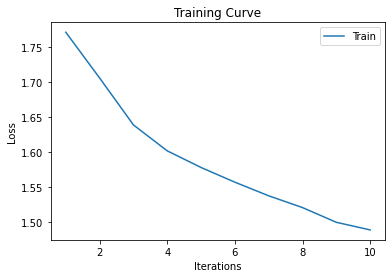

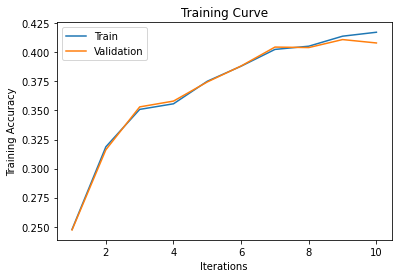

Final Training Accuracy: 0.4172616922527669
Final Validation Accuracy: 0.40803999166840244


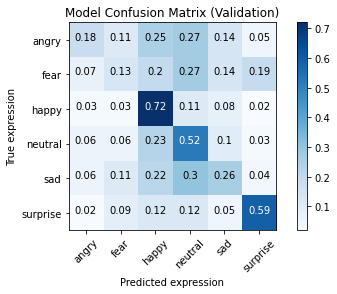

In [107]:
model1 = KLARR_NET()

if USE_CUDA:
    model1 = model1.cuda()

train(model1, train_data, valid_data, save=False)

Iteration 1: Train loss: 1.7105453353036533, Train accuracy: 0.3385398072117101 | Validation accuracy: 0.330764424078317
Iteration 2: Train loss: 1.5624916804107754, Train accuracy: 0.40454302034987505 | Validation accuracy: 0.39554259529264735
Iteration 3: Train loss: 1.4693786772814663, Train accuracy: 0.43457693680828274 | Validation accuracy: 0.4197042282857738
Iteration 4: Train loss: 1.4085327224297957, Train accuracy: 0.4504641199571582 | Validation accuracy: 0.42137054780254113
Iteration 5: Train loss: 1.3711312426762148, Train accuracy: 0.4835326669046769 | Validation accuracy: 0.4407415121849615
Iteration 6: Train loss: 1.330500696193088, Train accuracy: 0.4876383434487683 | Validation accuracy: 0.4413663820037492
Iteration 7: Train loss: 1.3062936040488156, Train accuracy: 0.5004462691895751 | Validation accuracy: 0.4432409914601125
Iteration 8: Train loss: 1.279037637466734, Train accuracy: 0.5058461263834345 | Validation accuracy: 0.4347011039366799
Iteration 9: Train loss

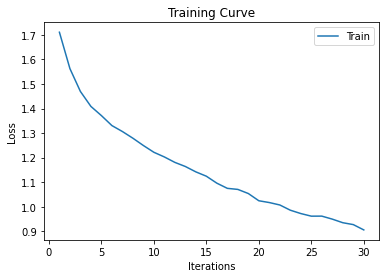

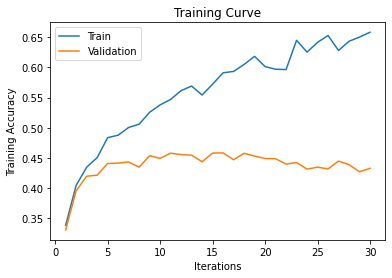

Final Training Accuracy: 0.6581131738664763
Final Validation Accuracy: 0.4328264944803166


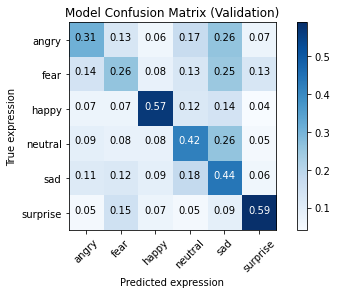

In [108]:
model2 = KLARR_NET()

if USE_CUDA:
    model2 = model2.cuda()

train(
    model2,
    train_data,
    valid_data,
    learning_rate=0.005, 
    batch_size=128,
    iterations=30
)

In [109]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

class KLARR_NET2(nn.Module):
    def __init__(self):
        super(KLARR_NET2, self).__init__()
        self.name = 'KLARR_NET2'

        self.pool = nn.MaxPool2d(2, 2)
        self.conv1 = nn.Conv2d(1, 15, 5)
        self.conv2 = nn.Conv2d(15, 30, 3)
        self.conv3 = nn.Conv2d(30, 45, 2)

        self.fc1 = nn.Linear(4*4*45, 500)
        self.fc2 = nn.Linear(500, 100)
        self.fc3 = nn.Linear(100, 6)

    def forward(self, x):
        # Convolutional layers
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))

        # Linear layers
        x = x.view(-1, 4*4*45)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)

        return x

Iteration 1: Train loss: 1.6990902870893478, Train accuracy: 0.34157443770082113 | Validation accuracy: 0.3318058737762966
Iteration 2: Train loss: 1.5635376125574112, Train accuracy: 0.3862013566583363 | Validation accuracy: 0.37283899187669234
Iteration 3: Train loss: 1.507413697513667, Train accuracy: 0.40864869689396643 | Validation accuracy: 0.39783378462820246
Iteration 4: Train loss: 1.4647392955693332, Train accuracy: 0.4299803641556587 | Validation accuracy: 0.4138721099770881
Iteration 5: Train loss: 1.425759261304682, Train accuracy: 0.4423866476258479 | Validation accuracy: 0.4211622578629452
Iteration 6: Train loss: 1.397175133228302, Train accuracy: 0.45443591574437703 | Validation accuracy: 0.4151218496146636
Iteration 7: Train loss: 1.3714496330781416, Train accuracy: 0.47929310960371296 | Validation accuracy: 0.44157467194334515
Iteration 8: Train loss: 1.3438818915323778, Train accuracy: 0.4838450553373795 | Validation accuracy: 0.44532389085607166
Iteration 9: Train 

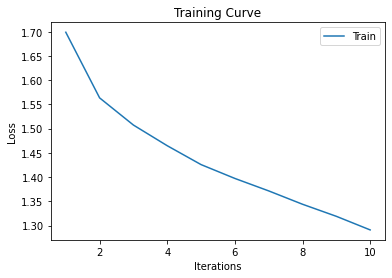

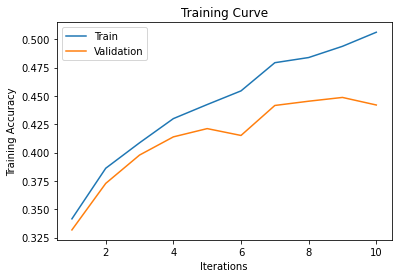

Final Training Accuracy: 0.506158514816137
Final Validation Accuracy: 0.44199125182253696


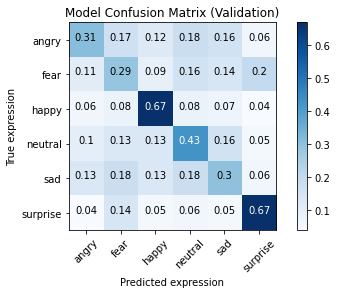

In [110]:
model3 = KLARR_NET()

if USE_CUDA:
    model3 = model3.cuda()

train(
    model3,
    train_data,
    valid_data,
    learning_rate=0.002,
    batch_size=256,
    iterations=10
)

Iteration 1: Train loss: 1.7554128766059875, Train accuracy: 0.2671813637986433 | Validation accuracy: 0.26556967298479484
Iteration 2: Train loss: 1.645162200385874, Train accuracy: 0.3449214566226348 | Validation accuracy: 0.33805457196417416
Iteration 3: Train loss: 1.5468283051794225, Train accuracy: 0.40311495894323457 | Validation accuracy: 0.3957508852322433
Iteration 4: Train loss: 1.4608594504269687, Train accuracy: 0.4314084255622992 | Validation accuracy: 0.4142886898562799
Iteration 5: Train loss: 1.3898538527163593, Train accuracy: 0.4688504105676544 | Validation accuracy: 0.44844823995001043
Iteration 6: Train loss: 1.3455695686015217, Train accuracy: 0.4714387718671903 | Validation accuracy: 0.43928348260779004
Iteration 7: Train loss: 1.2976167405193502, Train accuracy: 0.5114691181720814 | Validation accuracy: 0.4686523640908144
Iteration 8: Train loss: 1.2536830427971752, Train accuracy: 0.5336486968939664 | Validation accuracy: 0.48031660070818577
Iteration 9: Train 

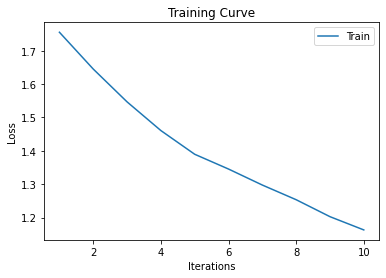

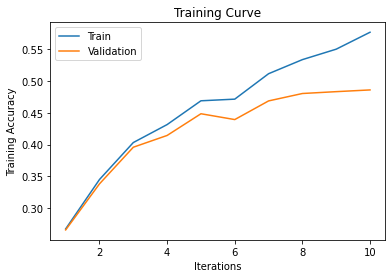

Final Training Accuracy: 0.5767583006069261
Final Validation Accuracy: 0.4859404290772756


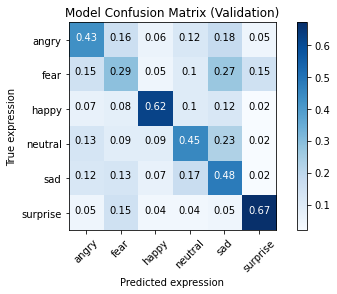

In [111]:
model4 = KLARR_NET2()

if USE_CUDA:
    model4 = model4.cuda()

train(
    model4,
    train_data,
    valid_data,
    learning_rate=0.002,
    batch_size=256,
    iterations=10
)

Iteration 1: Train loss: 1.727293160828677, Train accuracy: 0.29016422706176365 | Validation accuracy: 0.2995209331389294
Iteration 2: Train loss: 1.5823511982505971, Train accuracy: 0.3991431631560157 | Validation accuracy: 0.40054155384294937
Iteration 3: Train loss: 1.4933426285331899, Train accuracy: 0.42043020349875043 | Validation accuracy: 0.4126223703395126
Iteration 4: Train loss: 1.4089937968687578, Train accuracy: 0.4617547304534095 | Validation accuracy: 0.444490731097688
Iteration 5: Train loss: 1.3412573825229297, Train accuracy: 0.4888432702606212 | Validation accuracy: 0.4605290564465736
Iteration 6: Train loss: 1.284742390567606, Train accuracy: 0.5211531595858622 | Validation accuracy: 0.4886481982920225
Iteration 7: Train loss: 1.2230543142015284, Train accuracy: 0.5302570510531953 | Validation accuracy: 0.4736513226411164
Iteration 8: Train loss: 1.1703355407172984, Train accuracy: 0.5656015708675473 | Validation accuracy: 0.4876067485940429
Iteration 9: Train loss:

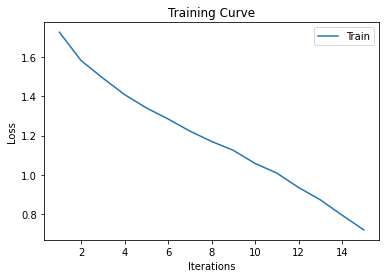

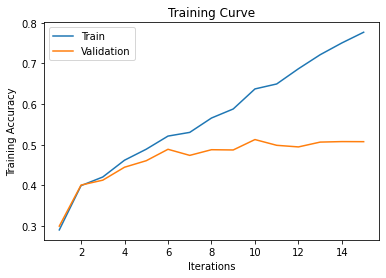

Final Training Accuracy: 0.7767761513745091
Final Validation Accuracy: 0.5073942928556551


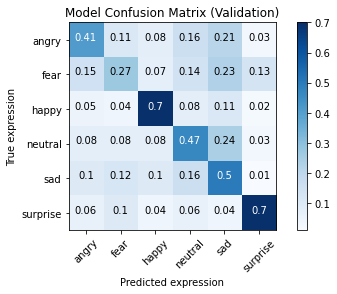

In [112]:
model5 = KLARR_NET2()

if USE_CUDA:
    model5 = model5.cuda()

train(
    model5,
    train_data,
    valid_data,
    learning_rate=0.003,
    batch_size=256,
    iterations=15
)

In [113]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

class KLARR_NET3(nn.Module):
    def __init__(self):
        super(KLARR_NET3, self).__init__()
        self.name = 'KLARR_NET3'

        self.pool = nn.MaxPool2d(2, 2)
        self.conv1 = nn.Conv2d(1, 30, 4, padding=2)
        self.conv2 = nn.Conv2d(30, 60, 3, padding=2)
        self.conv3 = nn.Conv2d(60, 90, 2, padding=2)

        self.fc1 = nn.Linear(8*8*90, 125)
        self.fc2 = nn.Linear(125, 50)
        self.fc3 = nn.Linear(50, 6)

    def forward(self, x):
        # Convolutional layers
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))

        # Linear layers
        x = x.view(-1,8*8*90)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)

        return x

Iteration 1: Train loss: 1.747543683106249, Train accuracy: 0.27070689039628704 | Validation accuracy: 0.270152051655905
Iteration 2: Train loss: 1.608324714682319, Train accuracy: 0.3876740449839343 | Validation accuracy: 0.386377837950427
Iteration 3: Train loss: 1.4603383500467648, Train accuracy: 0.4438147090324884 | Validation accuracy: 0.4328264944803166
Iteration 4: Train loss: 1.375098224390637, Train accuracy: 0.4763923598714745 | Validation accuracy: 0.45698812747344303
Iteration 5: Train loss: 1.2878750874237581, Train accuracy: 0.5224473402356301 | Validation accuracy: 0.48948135805040616
Iteration 6: Train loss: 1.2260160500353032, Train accuracy: 0.5360585505176723 | Validation accuracy: 0.497396375755051
Iteration 7: Train loss: 1.1610950041900983, Train accuracy: 0.5611835058907533 | Validation accuracy: 0.5067694230368673
Iteration 8: Train loss: 1.1134298335422168, Train accuracy: 0.6054980364155659 | Validation accuracy: 0.5257238075400958
Iteration 9: Train loss: 1.

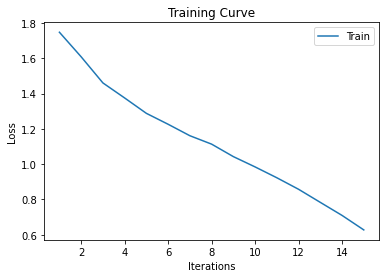

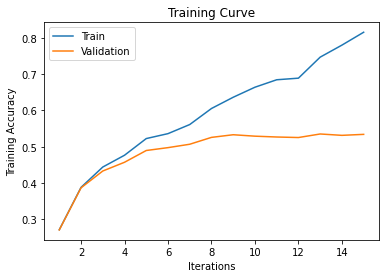

Final Training Accuracy: 0.81609246697608
Final Validation Accuracy: 0.5340554051239326


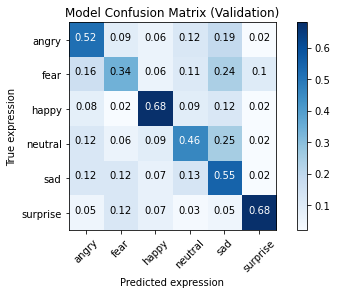

In [114]:
model6 = KLARR_NET3()

if USE_CUDA:
    model6 = model6.cuda()

train(
    model6,
    train_data,
    valid_data,
    learning_rate=0.002,
    batch_size=256,
    iterations=15
)

In [115]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

class KLARR_NET4(nn.Module):
    def __init__(self):
        super(KLARR_NET4, self).__init__()
        self.name = 'KLARR_NET4'

        self.pool = nn.MaxPool2d(2, 2)
        self.conv1 = nn.Conv2d(1, 30, 4, padding=2)
        self.conv2 = nn.Conv2d(30, 60, 3, padding=2)
        self.conv3 = nn.Conv2d(60, 90, 2, padding=2)

        self.fc1 = nn.Linear(8*8*90, 75)
        self.fc2 = nn.Linear(75, 20)
        self.fc3 = nn.Linear(20, 6)

    def forward(self, x):
        # Convolutional layers
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))

        # Linear layers
        x = x.view(-1,8*8*90)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)

        return x

Iteration 1: Train loss: 1.7429798191243953, Train accuracy: 0.2918154230631917 | Validation accuracy: 0.2999375130181212
Iteration 2: Train loss: 1.613128113475713, Train accuracy: 0.3570153516601214 | Validation accuracy: 0.35034367840033326
Iteration 3: Train loss: 1.4913762780753048, Train accuracy: 0.43270260621206713 | Validation accuracy: 0.4222037075609248
Iteration 4: Train loss: 1.4055461084300822, Train accuracy: 0.4634059264548376 | Validation accuracy: 0.43699229327223493
Iteration 5: Train loss: 1.329338719899004, Train accuracy: 0.501472688325598 | Validation accuracy: 0.47281816288273276
Iteration 6: Train loss: 1.2640125819227912, Train accuracy: 0.5177168868261335 | Validation accuracy: 0.47635909185586334
Iteration 7: Train loss: 1.2144941362467678, Train accuracy: 0.5488218493395216 | Validation accuracy: 0.4951051864194959
Iteration 8: Train loss: 1.16365700553764, Train accuracy: 0.5792127811495894 | Validation accuracy: 0.5086440324932305
Iteration 9: Train loss:

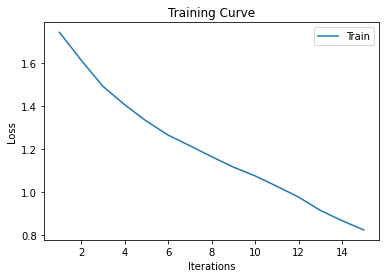

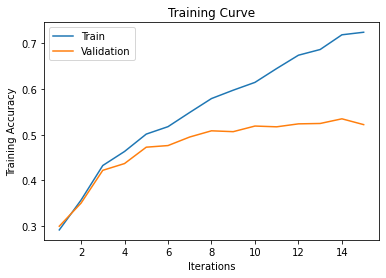

Final Training Accuracy: 0.7242948946804713
Final Validation Accuracy: 0.5221828785669652


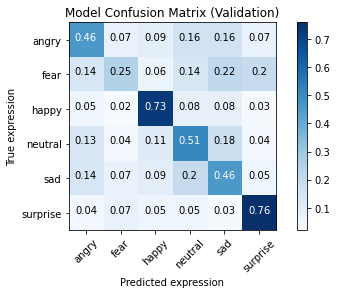

In [117]:
model7 = KLARR_NET4()

if USE_CUDA:
    model7 = model7.cuda()

train(
    model7,
    train_data,
    valid_data,
    learning_rate=0.002,
    batch_size=256,
    iterations=15
)

In [118]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

class KLARR_NET5(nn.Module):
    def __init__(self):
        super(KLARR_NET5, self).__init__()
        self.name = 'KLARR_NET5'

        self.conv = nn.Sequential(
            nn.Conv2d(1, 64, 3),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),

            nn.Conv2d(64, 128, 3),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),

            nn.Conv2d(128, 256, 2),
            nn.ReLU(),
            nn.MaxPool2d(2, 2)
        )

        self.fc_input = 4*4*256

        self.fc = nn.Sequential(
            nn.Linear(self.fc_input, 75),
            nn.ReLU(),

            nn.Linear(75, 20),
            nn.ReLU(),

            nn.Linear(20, 6)
        )

    def forward(self, x):
        x = self.conv(x)
        x = self.fc(x.view(-1, self.fc_input))
        return x

Iteration 1: Train loss: 1.7417593977668069, Train accuracy: 0.27807033202427706 | Validation accuracy: 0.2809831285148927
Iteration 2: Train loss: 1.63466070050543, Train accuracy: 0.3500089253837915 | Validation accuracy: 0.3507602582795251
Iteration 3: Train loss: 1.5252694677222858, Train accuracy: 0.39780435558729027 | Validation accuracy: 0.38846073734638614
Iteration 4: Train loss: 1.4485644833608107, Train accuracy: 0.44069082470546234 | Validation accuracy: 0.426786086232035
Iteration 5: Train loss: 1.378980746323412, Train accuracy: 0.46661906461977865 | Validation accuracy: 0.45698812747344303
Iteration 6: Train loss: 1.3380325842987408, Train accuracy: 0.4832649053909318 | Validation accuracy: 0.4580295771714226
Iteration 7: Train loss: 1.2899520221081646, Train accuracy: 0.49406461977865046 | Validation accuracy: 0.4626119558425328
Iteration 8: Train loss: 1.2544612952254035, Train accuracy: 0.5276240628347019 | Validation accuracy: 0.4774005415538429
Iteration 9: Train lo

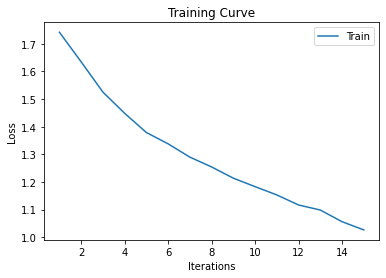

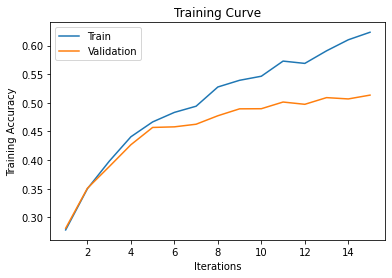

Final Training Accuracy: 0.6232149232416994
Final Validation Accuracy: 0.5134347011039366


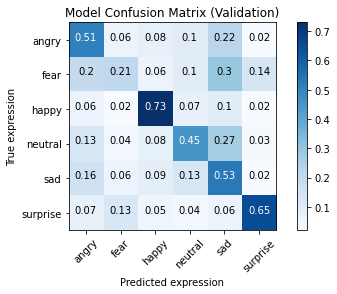

In [119]:
model8 = KLARR_NET5()

if USE_CUDA:
    model8 = model8.cuda()

train(
    model8,
    train_data,
    valid_data,
    learning_rate=0.002,
    batch_size=256,
    iterations=15
)